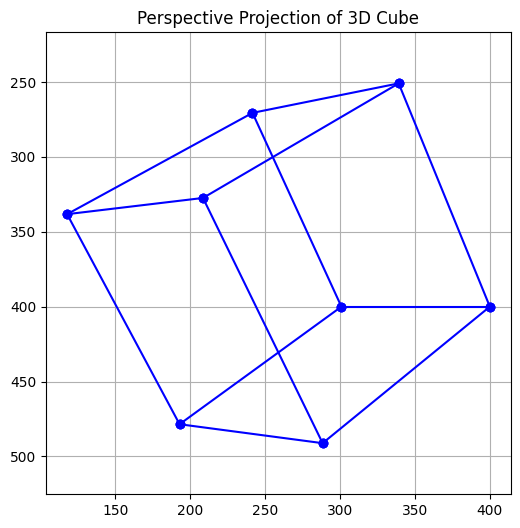

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define cube corners (in world coordinates)
cube_points = np.array([
    [0,0,0,1], [1,0,0,1], [1,1,0,1], [0,1,0,1],
    [0,0,1,1], [1,0,1,1], [1,1,1,1], [0,1,1,1]
]).T  # shape: (4, 8)

# 2. Define extrinsic matrix M = [R | t]
def get_rotation_matrix(rx, ry, rz):
    # Convert degrees to radians
    rx, ry, rz = np.radians([rx, ry, rz])
    # Rotation matrices
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(rx), -np.sin(rx)],
                   [0, np.sin(rx), np.cos(rx)]])
    Ry = np.array([[np.cos(ry), 0, np.sin(ry)],
                   [0, 1, 0],
                   [-np.sin(ry), 0, np.cos(ry)]])
    Rz = np.array([[np.cos(rz), -np.sin(rz), 0],
                   [np.sin(rz), np.cos(rz), 0],
                   [0, 0, 1]])
    return Rz @ Ry @ Rx

R = get_rotation_matrix(rx=30, ry=45, rz=0)
t = np.array([[0], [0], [-5]])  # Move cube away from camera
M = np.hstack((R, t))  # shape: (3, 4)

# 3. Define intrinsic matrix K
f = 800  # focal length
cx, cy = 400, 400  # image center
K = np.array([
    [f, 0, cx],
    [0, f, cy],
    [0, 0, 1]
])

# 4. Project 3D points to 2D
projected = K @ M @ cube_points  # shape: (3, 8)
projected /= projected[2]  # normalize by z (homogeneous to Euclidean)

# 5. Plot
x, y = projected[0], projected[1]
edges = [
    (0,1),(1,2),(2,3),(3,0),  # bottom face
    (4,5),(5,6),(6,7),(7,4),  # top face
    (0,4),(1,5),(2,6),(3,7)   # vertical edges
]

plt.figure(figsize=(6,6))
for i, j in edges:
    plt.plot([x[i], x[j]], [y[i], y[j]], 'bo-')
plt.gca().invert_yaxis()
plt.title('Perspective Projection of 3D Cube')
plt.axis('equal')
plt.grid(True)
plt.show()
